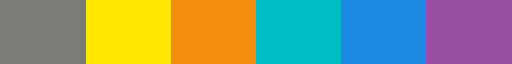

In [1]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.graph_objs.layout import Scene
from plotly.graph_objs.layout.scene import XAxis, YAxis, ZAxis
import plotly.graph_objects as go
from scipy.interpolate import interp1d

# Import custom functions
from scripts.functions import *

sns.set(style='white', context='notebook')

import matplotlib as mpl
cmap = mpl.colors.ListedColormap(["#7B7B7A", "#FFE701", "#F38F0D", "#00bfc4", "#1E88E5", "#984ea3"])
state_color_map = {
    0: "#7B7B7A",
    1: "#FFE701",
    2: "#F38F0D",
    3: "#00bfc4",
    4: "#1E88E5",
    5: "#984ea3",
}
cmap

# Compare waveforms alignments

In [3]:
rat = '1'
condition = 'OR_N'

In [4]:
Rat_data = pd.read_hdf('PFC_resampled_cycles_data.h5', f'Rat_{rat}_{condition}')
metrics = Rat_data.iloc[:, :-128]
resampled_waveforms = np.array(Rat_data.iloc[:, -128:])

In [5]:
Rat_data = pd.read_hdf('PFC_normalized_cycles_data.h5', f'Rat_{rat}_{condition}')
metrics = Rat_data.iloc[:, :-128]
norm_waveforms = np.array(Rat_data.iloc[:, -128:])

In [6]:
Rat_data = pd.read_hdf('PFC_normalized_if_cycles_data.h5', f'Rat_{rat}_{condition}')
metrics = Rat_data.iloc[:, :-128]
norm_if_waveforms = np.array(Rat_data.iloc[:, -128:])

### Get Actual cycles

In [12]:
# Set path to LFP data and sleep state files
rat = '1'
region = 'PFC'
path_to_data = './data/OS_basic_separated/1/study_day_5_OR_N/'
data_file = 'Cleaned_Trial1_PFC_100_CH11.continuous.mat'
states_file = 'post_trial1_states_merged.mat'
data1, sleep_scoring1 = load_mat_data(path_to_data, data_file, states_file)

data_file = 'Cleaned_Trial2_PFC_100_CH11.continuous.mat'
states_file = 'post_trial2_2017-10-03_12-00-20_1-states.mat'
data2, sleep_scoring2 = load_mat_data(path_to_data, data_file, states_file)

data_file = 'Cleaned_Trial3_PFC_100_CH11.continuous.mat'
states_file = 'post_trial3_2017-10-03_12-53-38-states.mat'
data3, sleep_scoring3 = load_mat_data(path_to_data, data_file, states_file)

data_file = 'Cleaned_Trial4_PFC_100_CH11.continuous.mat'
states_file = 'post_trial4_2017-10-03_13-45-43-states.mat'
data4, sleep_scoring4 = load_mat_data(path_to_data, data_file, states_file)

data_file = 'Cleaned_Trial5_PFC_100_CH11_3.continuous.mat'
states_file = 'post_trial5_2017-10-03_15-12-56_2-states.mat'
data5, sleep_scoring5 = load_mat_data(path_to_data, data_file, states_file)

In [16]:
# Z-scoring
data1 = (data1 - np.mean(data1)) / np.std(data1)
data2 = (data2 - np.mean(data2)) / np.std(data2)
data3 = (data3 - np.mean(data3)) / np.std(data3)
data4 = (data4 - np.mean(data4)) / np.std(data4)
data5 = (data5 - np.mean(data5)) / np.std(data5)

In [18]:
fs = 2500 # Sampling Frequency
# filtered_data1 = filter_signal(data1, fs, 'bandpass', (0.1, 4), n_cycles=3, filter_type='iir', butterworth_order=6, remove_edges=False)
filtered_data1 = filter_signal(data1, fs, 'bandpass', (0.1, 4), n_cycles=3, filter_type='fir', remove_edges=False)
IP1, IF1, IA1 = emd.spectra.frequency_transform(filtered_data1, fs, 'hilbert')
C = emd.cycles.Cycles(IP1)
cycles1 = get_cycles_with_metrics(C, filtered_data1, IA1, IF1)

# filtered_data2 = filter_signal(data2, fs, 'bandpass', (0.1, 4), n_cycles=3, filter_type='iir', butterworth_order=6, remove_edges=False)
filtered_data2 = filter_signal(data2, fs, 'bandpass', (0.1, 4), n_cycles=3, filter_type='fir', remove_edges=False)
IP2, IF2, IA2 = emd.spectra.frequency_transform(filtered_data2, fs, 'hilbert')
C = emd.cycles.Cycles(IP2)
cycles2 = get_cycles_with_metrics(C, filtered_data2, IA2, IF2)

# filtered_data3 = filter_signal(data3, fs, 'bandpass', (0.1, 4), n_cycles=3, filter_type='iir', butterworth_order=6, remove_edges=False)
filtered_data3 = filter_signal(data3, fs, 'bandpass', (0.1, 4), n_cycles=3, filter_type='fir', remove_edges=False)
IP3, IF3, IA3 = emd.spectra.frequency_transform(filtered_data3, fs, 'hilbert')
C = emd.cycles.Cycles(IP3)
cycles3 = get_cycles_with_metrics(C, filtered_data3, IA3, IF3)

# filtered_data4 = filter_signal(data4, fs, 'bandpass', (0.1, 4), n_cycles=3, filter_type='iir', butterworth_order=6, remove_edges=False)
filtered_data4 = filter_signal(data4, fs, 'bandpass', (0.1, 4), n_cycles=3, filter_type='fir', remove_edges=False)
IP4, IF4, IA4 = emd.spectra.frequency_transform(filtered_data4, fs, 'hilbert')
C = emd.cycles.Cycles(IP4)
cycles4 = get_cycles_with_metrics(C, filtered_data4, IA4, IF4)

# filtered_data5 = filter_signal(data5, fs, 'bandpass', (0.1, 4), n_cycles=3, filter_type='iir', butterworth_order=6, remove_edges=False)
filtered_data5 = filter_signal(data5, fs, 'bandpass', (0.1, 4), n_cycles=3, filter_type='fir', remove_edges=False)
IP5, IF5, IA5 = emd.spectra.frequency_transform(filtered_data5, fs, 'hilbert')
C = emd.cycles.Cycles(IP5)
cycles5 = get_cycles_with_metrics(C, filtered_data5, IA5, IF5)

 Checking Cycles inputs - trimming singleton from input 'IP'
 Checking Cycles inputs - trimming singleton from input 'IP'
 Checking Cycles inputs - trimming singleton from input 'IP'
 Checking Cycles inputs - trimming singleton from input 'IP'
 Checking Cycles inputs - trimming singleton from input 'IP'


In [32]:
cycles1 = get_cycles_with_conditions(cycles1, 'is_good==1')
cycles2 = get_cycles_with_conditions(cycles2, 'is_good==1')
cycles3 = get_cycles_with_conditions(cycles3, 'is_good==1')
cycles4 = get_cycles_with_conditions(cycles4, 'is_good==1')
cycles5 = get_cycles_with_conditions(cycles5, 'is_good==1')

In [62]:
metrics1 = cycles1.get_metric_dataframe(subset=True)
metrics1['State'] = ((metrics1['start_sample']+metrics1['stop_sample'])//2).apply(get_sleep_state, sleep_scoring=sleep_scoring1)
metrics1['Post_Trial'] = 1

metrics2 = cycles2.get_metric_dataframe(subset=True)
metrics2['State'] = ((metrics2['start_sample']+metrics2['stop_sample'])//2).apply(get_sleep_state, sleep_scoring=sleep_scoring2)
metrics2['Post_Trial'] = 2

metrics3 = cycles3.get_metric_dataframe(subset=True)
metrics3['State'] = ((metrics3['start_sample']+metrics3['stop_sample'])//2).apply(get_sleep_state, sleep_scoring=sleep_scoring3)
metrics3['Post_Trial'] = 3

metrics4 = cycles4.get_metric_dataframe(subset=True)
metrics4['State'] = ((metrics4['start_sample']+metrics4['stop_sample'])//2).apply(get_sleep_state, sleep_scoring=sleep_scoring4)
metrics4['Post_Trial'] = 4

metrics5 = cycles5.get_metric_dataframe(subset=True)
metrics5['State'] = ((metrics5['start_sample']+metrics5['stop_sample'])//2).apply(get_sleep_state, sleep_scoring=sleep_scoring5)
metrics5['Post_Trial'] = 5

all_metrics = pd.concat([metrics1, metrics2, metrics3, metrics4, metrics5])
all_metrics['cycle_time'] = (all_metrics['start_sample']+all_metrics['stop_sample'])/(2*fs)

In [88]:
metrics5.shape

(14306, 19)

In [100]:
resampled_waveforms5 = resampled_waveforms[resampled_waveforms.shape[0]-14306:,:]
norm_waveforms5 = norm_waveforms[norm_waveforms.shape[0]-14306:,:]
norm_if_waveforms5 = norm_if_waveforms[norm_if_waveforms.shape[0]-14306:,:]

### Plot

In [164]:
index = np.random.randint(0,metrics5.shape[0])
index

9435

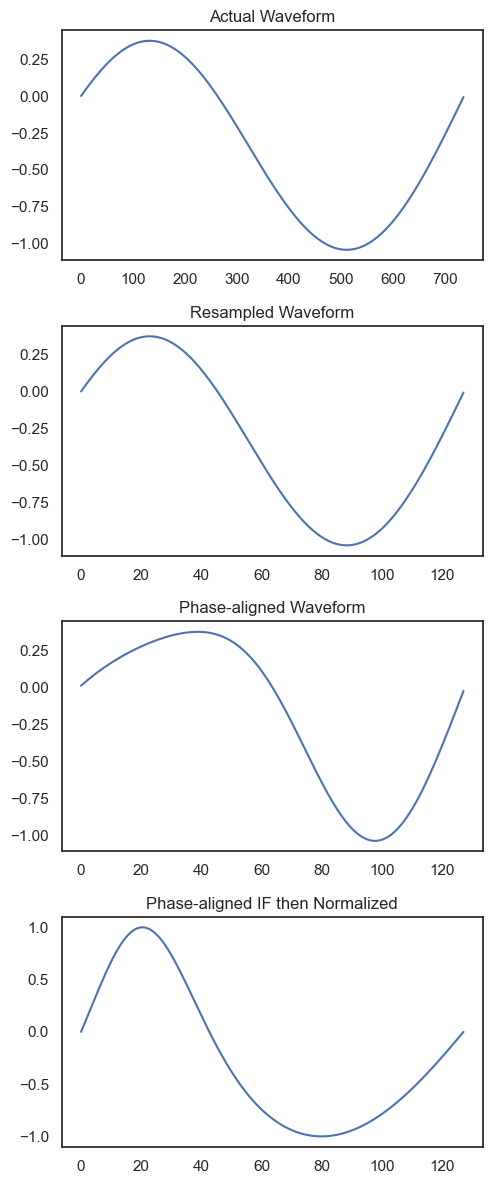

In [237]:
fig, axes = plt.subplots(4, 1, figsize=(5, 12))
index = np.random.randint(0,metrics5.shape[0])
axes[0].plot(filtered_data5[cycles5.get_inds_of_cycle(metrics5.iloc[index, 0])]);
axes[0].set_title('Actual Waveform')
axes[1].plot(resampled_waveforms5[index]);
axes[1].set_title('Resampled Waveform')
axes[2].plot(norm_waveforms5[index]);
axes[2].set_title('Phase-aligned Waveform')
axes[3].plot(norm_if_waveforms5[index]);
axes[3].set_title('Phase-aligned IF then Normalized')
plt.tight_layout()
plt.savefig(f'./plots/Compare_alignments/Rat-{rat}-{condition} Cycle-{index}.png')